<a href="https://colab.research.google.com/github/HemantTiwariGitHub/Embedding2Embedding/blob/master/TheTrainerVG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 try:
    %tensorflow_version 2.x
except:
    pass

TensorFlow 2.x selected.


In [19]:
import tensorflow as tf
import tensorflow_hub as hub
from absl import logging
import numpy as np
from PIL import Image as PIL_Image
from io import StringIO
import numpy as np
import PIL.Image as Image
import pathlib


print("\u2022 Using TensorFlow Version:", tf.__version__)
print("\u2022 Using TensorFlow Hub Version: ", hub.__version__)
print('\u2022 GPU Device Found.' if tf.test.is_gpu_available() else '\u2022 GPU Device Not Found. Running on CPU')

• Using TensorFlow Version: 2.1.0-rc1
• Using TensorFlow Hub Version:  0.7.0
• GPU Device Not Found. Running on CPU


In [3]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [0]:
MOBILENET_V2_FEATURE_EXTRACTOR_URI = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
PIXEL =224
INPUT_IMAGE_SIZE = (PIXEL, PIXEL)
OUTPUT_FEATURE_VECTOR_SIZE = 1280
feature_extractor = hub.KerasLayer(MOBILENET_V2_FEATURE_EXTRACTOR_URI,
                                   input_shape=INPUT_IMAGE_SIZE + (3,), 
                                   output_shape=[OUTPUT_FEATURE_VECTOR_SIZE],
                                   trainable=False)
MobileNetModel = tf.keras.Sequential([
        feature_extractor
])

In [0]:
def resize_image(image):
    #print("resizing:") 
    resized_img = image.resize(INPUT_IMAGE_SIZE)
    #resized_img.show()
    resized_img_arr = np.array(resized_img)/255.0
    return resized_img_arr

def getImageEmbedding(regionImage, model):
    resizedImage = resize_image(regionImage)
    #plt.imshow(resizedImage)
    #plt.show()
    embedding = model.predict(resizedImage[np.newaxis, ...])
    #print(embedding)
    return embedding

In [0]:
def readImageFromDrive(imgId, regId):
    drivepath = '/content/drive/My Drive/'
    imagepath = drivepath +  'Region_Image/Image_' + str(imgId)+'_Region_' + str(regId)+'.jpg'
    imageName =  str(imgId) + '_' + str(regId)
    imageGet = tf.keras.utils.get_file(imageName, pathlib.Path(imagepath).as_uri())
    imageRead = Image.open(imageGet)
    return imageRead

In [20]:
imgReg = readImageFromDrive(125,2)
imgEmbedding = getImageEmbedding(imgReg, MobileNetModel )
print(imgEmbedding)

[[0.9606538  1.7073144  1.3611007  ... 0.5518554  0.07739219 0.47317785]]


In [0]:
def readTextFromDrive(imgId, regID):

    drivepath = '/content/drive/My Drive/'
    IembeddingPath = drivepath+'/Region_Descp'
    descpath =  drivepath + 'Region_Descp/Image_' + str(imgId)+'_Region_Descp' + str(regID)+'.txt'
    f = open(descpath, 'r')
    content = f.read()
    return content

In [0]:
def readEmbeddingFromDrive(imgId, regID):

    drivepath = '/content/drive/My Drive/'
    IembeddingPath = drivepath+'/Region_Descp'
    descpath =  drivepath + 'Image_Embedding/Image_' + str(imgId)+'_Embedding_'+ str(regID)+'.txt'
    f = open(descpath, 'r')
    content = f.read()
    return content


In [10]:
!unzip <filename>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `unzip <filename>'


In [0]:
def getFileList(path):
    import glob,os
    iwd = os.getcwd()
    os.chdir(path)
    filelist= []
    for file in glob.glob("*.txt"):
        filelist.append(file)
    os.chdir(iwd)
    return filelist

In [0]:
import re
def getImageIDregID(str1):
    idList = list(map(int, re.findall('\d+',str1)))
    return idList

In [0]:
def getAllPairs(loadpath):
  ListOfFiles = getFileList(loadpath)
  ListOfID = []
  for filename in ListOfFiles:
    #print(filename)
    ID,REGID = getImageIDregID(filename)
    ListOfID.append([ID,REGID])
  return ListOfID

In [14]:
LOADING_PATH = "/content/Region_Descp"
ListOfIDs = getAllPairs(LOADING_PATH)

print(len(ListOfIDs))

56775


In [0]:
def LoadBatch(baseIndex, batchSize, sourceList):
    maxIndex = baseIndex + batchSize
    xList = []
    yList = []
    while (baseIndex < maxIndex):
        #if (baseIndex%10==0):
        print("\n\nreading index" + str(baseIndex))
        description = readTextFromDrive(sourceList[baseIndex][0], sourceList[baseIndex][1])
        print("descp:" + description)
        x = embed([description])
        print("Text Embedding" + str(x))
        

        imgReg = readImageFromDrive(sourceList[baseIndex][0], sourceList[baseIndex][1])
        display(imgReg)
        y = getImageEmbedding(imgReg, MobileNetModel )
        print("Image Embedding" + str(y))
        xList.append(x)
        yList.append(y)
        baseIndex = baseIndex + 1

    return xList,yList



reading index11
descp:car covered in snow
Text Embeddingtf.Tensor(
[[-0.01166598  0.07344275 -0.00893189 ...  0.05081348  0.04655568
   0.04756867]], shape=(1, 512), dtype=float32)


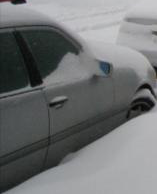

Image Embedding[[0.47616974 1.3745195  0.6908214  ... 1.214446   0.         0.00372414]]


reading index12
descp:red four door car
Text Embeddingtf.Tensor(
[[-0.0139673   0.02327273 -0.07381117 ...  0.04117713  0.07867887
   0.04716184]], shape=(1, 512), dtype=float32)


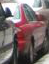

Image Embedding[[0.2677278  0.15419549 0.06782058 ... 0.0162147  0.         0.76723504]]


reading index13
descp:Wooden slatted headboard
Text Embeddingtf.Tensor(
[[ 0.02585116  0.07073835  0.01293609 ... -0.01475588  0.07758672
  -0.0021912 ]], shape=(1, 512), dtype=float32)


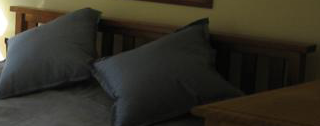

Image Embedding[[0.2413528  0.         0.10350136 ... 0.3181285  0.         0.04874894]]


reading index14
descp:black bag that the name is carrying
Text Embeddingtf.Tensor(
[[ 0.00239766  0.07818585 -0.00421004 ...  0.02702709  0.05733426
  -0.01643741]], shape=(1, 512), dtype=float32)


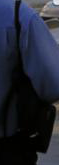

Image Embedding[[1.4263403  0.33740017 0.21968108 ... 0.40472057 0.00402653 0.612582  ]]


reading index15
descp:The maroon awning
Text Embeddingtf.Tensor(
[[ 0.03776991  0.04627893 -0.02832874 ... -0.03581674  0.00079071
   0.06294535]], shape=(1, 512), dtype=float32)


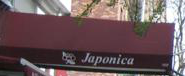

Image Embedding[[1.1379702  0.40348208 0.6418957  ... 0.35779506 0.01138821 1.468602  ]]


In [32]:
import numpy as np
np.set_printoptions(threshold=10)
X,Y = LoadBatch(11, 5, ListOfIDs)

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

tf.keras.backend.clear_session() 

In [0]:
print()